In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob

In [2]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'
test_dir = '/home/grace/Documents/python/ttc_inhalation/data/external/TEST/'
times_dir = '/home/grace/Documents/python/ttc_inhalation/data/external/TIMES/'

'/home/grace/Documents/python/acute_nelms/code'

### Mark Nelms and Grace Patlewicz
### Contact patlewicz.grace@epa.gov

### Import TEST predictions from multiple files into one dataframe

In [4]:
TEST_all = pd.DataFrame()
for f in glob.glob(test_dir+'*.txt'):
    df = pd.read_csv(f, sep = '|', header = 1)
    TEST_all = TEST_all.append(df, ignore_index = True)

/home/grace/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
TEST_all.shape

(10760, 7)

In [6]:
#TEST_all

In [7]:
TEST_all.columns

Index(['#', 'Exp', 'ID', 'Pred_Consensus', 'Pred_FDA',
       'Pred_Hierarchical clustering', 'Pred_Nearest neighbor'],
      dtype='object')

In [8]:
TEST_all.columns = ['#', 'known_LD50', 'CAS', 'pred_LD50_Con', 'Pred_FDA',
       'pred_LD50_HC', 'pred_LD50_NN']

In [9]:
TEST_all.drop(['#', 'Pred_FDA'], axis = 1, inplace = True)

In [10]:
TEST_all[TEST_all['CAS'] == '62751-72-8']

,known_LD50,CAS,pred_LD50_Con,pred_LD50_HC,pred_LD50_NN
10715,3.83,62751-72-8,3.44,3.62,3.44


### Importing all TIMES acute toxicity predictions

In [13]:
TIMES_all = pd.DataFrame()
for f in glob.glob(times_dir+'*.tsv'):
    df = pd.read_csv(f, sep = '\t')
    TIMES_all = TIMES_all.append(df, ignore_index = True)

/home/grace/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [14]:
TIMES_all.shape

(10417, 31)

In [15]:
TIMES_all.head()

,# in list,Acute Oral Toxicity Predicted_LD50 mg/kg,Acute Oral Toxicity_Confidence,Acute Oral Toxicity_Observed,Alert reliability,All predictions,CAS,Chem. Name,Converter_Version_Struc,Correct fragments Structural domain,...,Molecular Initiating Event 3,OASIS_PARENT_TYPE,Parameter ranges,Predicted toxicological category,Remark,Smiles,Total Domain,Total Structural domain,Unknown fragments Structural domain,log_Kp_exp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2610,from 307 to 22200,no data,"High, >= 60% (Num of train.set chem>=4)",Substituted aromatic azo compounds-2610.430fro...,64896-26-0,DTXSID2020133,,100.00%,...,NaN,,In domain,Substituted aromatic azo compounds,,Oc1ccc(/N=N/c2ccc(C(O)=O)cc2)cc1C(O)=O,In domain,In domain,0.00%,
2,2.0,Not predicted,Not predicted,no data,,,64896-70-4,DTXSID60215219,,NaN,...,NaN,,NaN,Not classified,,CCCCCCCC(=O)OC1COC2C1OCC2OC(=O)CCCCCCC,NaN,NaN,NaN,
3,3.0,Not predicted,Not predicted,no data,,,64910-63-0,DTXSID10215224,,NaN,...,NaN,,NaN,Not classified,,CCCCS(=O)(=O)NC1CCCCC1,NaN,NaN,NaN,
4,4.0,1190,from 266 to 5300,1160.1356,"High, >= 60% (Num of train.set chem>=4)",Xanthine derivatives carbon not substituted-11...,6493-05-6,DTXSID7023437,,100.00%,...,NaN,,In domain,Xanthine derivatives carbon not substituted,belonging in tr set,CC(=O)CCCCN1C(=O)C2=C(N=CN2C)N(C)C1=O,In domain,In domain,0.00%,


In [16]:
TIMES_all.columns = ['# in list', 'pred_LD50)',
       'Acute Oral Toxicity_Confidence', 'known_LD50',
       'Alert reliability', 'All predictions', 'CAS', 'Chem. Name',
       'Converter_Version_Struc', 'Correct fragments Structural domain',
       'Effect (biological outcome) 1', 'Effect (biological outcome) 2',
       'Effect (biological outcome) 3', 'Example Target Organ System 1',
       'Example Target Organ System 2', 'Example Target Organ System 3',
       'Exp_WaterSolubility', 'Exp_log(Kow)',
       'Incorrect fragments Structural domain', 'Molecular Initiating Event 1',
       'Molecular Initiating Event 2', 'Molecular Initiating Event 3',
       'OASIS_PARENT_TYPE', 'Parameter ranges',
       'Predicted toxicological category', 'Remark', 'Smiles', 'Total Domain',
       'Total Structural domain', 'Unknown fragments Structural domain',
       'log_Kp_exp']

In [17]:
TIMES_all = TIMES_all.iloc[1:,:]

In [18]:
TIMES_all.shape

(10416, 31)

In [19]:
TIMES_all['# in list'].count()

10371

In [21]:
TIMES_all = TIMES_all[~TIMES_all['Chem. Name'].isnull()]

In [22]:
TIMES_all.shape

(10371, 31)

In [23]:
TIMES_all.columns = ['# in list', 'pred_LD50', 'acute_oral_toxicity_confidence',
       'known_LD50', 'alert_reliability', 'All predictions', 'CAS',
       'chem_name', 'Converter_Version_Struc',
       'correct_fragments_structural_domain', 'effect_biological_outcome_1',
       'effect_biological outcome_2', 'effect_biological outcome_3',
       'example_target_organ_system_1', 'example_target_organ_system_2',
       'example_target_organ_system_3', 'Exp_WaterSolubility', 'Exp_log(Kow)',
       'incorrect_fragments_structural_domain', 'molecular_initiating_event_1',
       'molecular_initiating_event_2', 'molecular_initiating_event_3',
       'OASIS_PARENT_TYPE', 'parameter_ranges',
       'predicted_toxicological_category', 'Remark', 'Smiles', 'total_domain',
       'total_structural_domain', 'unknown_fragments_structural_domain',
       'log_Kp_exp']

In [24]:
TIMES_all = TIMES_all[['CAS','chem_name',  'Smiles', 'predicted_toxicological_category','known_LD50','pred_LD50', 'acute_oral_toxicity_confidence', 'molecular_initiating_event_1',
       'effect_biological_outcome_1','molecular_initiating_event_2', 'effect_biological outcome_2', 'molecular_initiating_event_3', 'effect_biological outcome_3',
        'alert_reliability', 'parameter_ranges', 
       'correct_fragments_structural_domain', 
       'incorrect_fragments_structural_domain', 'unknown_fragments_structural_domain', 'total_structural_domain', 
        'total_domain',
       'Remark']]

In [25]:
TIMES_all.shape

(10371, 21)

### Import processed acute toxicity data from NICEATM

In [27]:
acute_proc = pd.read_csv(raw_dat_dir+'AcuteTox FullDataset Processed 171130.csv')

In [28]:
acute_proc.columns = ['CAS', 'very_toxic', 'nontoxic', 'known_LD50_mgkg', 'EPA_category',
       'GHS_category']

In [29]:
acute_proc.head()

,CAS,very_toxic,nontoxic,known_LD50_mgkg,EPA_category,GHS_category
0,100-00-5,False,False,460.0,2.0,4.0
1,100-01-6,False,False,750.0,3.0,4.0
2,100-02-7,False,False,170.0,2.0,3.0
3,100-03-8,False,False,NaN,3.0,4.0
4,100-06-1,False,False,1720.0,3.0,4.0


In [30]:
acute_proc['known_LD50_mgkg'].count()

8979

In [31]:
acute_proc.shape

(11992, 6)

### Read in MWs for chemicals

In [32]:
MW_all = pd.DataFrame()
for f in glob.glob(raw_dat_dir+'ChemistryDashboard-Batch-Search_2019*.tsv'):
    df = pd.read_csv(f, sep = '\t')
    MW_all = MW_all.append(df, ignore_index = True)

In [33]:
MW_all.shape

(11992, 7)

In [34]:
MW_all.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,AVERAGE_MASS,QSAR_READY_SMILES
0,30238-40-5,CAS-RN,DTXSID40952610,"Ethyl 1,6-dimethyl-4-oxo-1,6,7,8,9,9a-hexahydr...",CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O,252.314,CCOC(=O)C1=CN(C)C2CCCC(C)N2C1=O
1,30238-41-6,CAS-RN,DTXSID00952611,"Ethyl 1-ethyl-6-methyl-4-oxo-1,6,7,8,9,9a-hexa...",CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O,266.341,CCOC(=O)C1=CN(CC)C2CCCC(C)N2C1=O
2,3025-30-7,CAS-RN,DTXSID0041357,"Ethyl (2E,4Z)-deca-2,4-dienoate",CCCCC\C=C/C=C/C(=O)OCC,196.29,CCCCCC=CC=CC(=O)OCC
3,3027-21-2,CAS-RN,DTXSID4044909,Dimethoxy(methyl)phenylsilane,CO[Si](C)(OC)C1=CC=CC=C1,182.294,CO[Si](C)(OC)C1=CC=CC=C1
4,30286-75-0,CAS-RN,DTXSID0023402,Oxitropium bromide,[Br-].CC[N+]1(C)[C@H]2C[C@@H](C[C@@H]1[C@H]1O[...,412.324,[H]C12CC(CC([H])(C3OC13)[N+]2(C)CC)OC(=O)C(CO)...


In [35]:
MW_all.columns =  ['CAS', 'found_by', 'DTXSID', 'name', 'smiles',
       'average_mass', 'qsar_ready_smiles']

In [36]:
MW_all = MW_all[['CAS', 'found_by', 'DTXSID', 'name', 'average_mass',
       'qsar_ready_smiles','smiles']]

In [37]:
MW_all = MW_all[MW_all['qsar_ready_smiles'] != '-']

In [38]:
MW_all.shape

(10886, 7)

### Import in ToxPrint chemotypes

In [39]:
chemotypes = pd.read_csv(raw_dat_dir+'Acute_SMILES_Toxprints.tsv', sep = '\t')

In [40]:
chemotypes.shape

(10886, 730)

In [41]:
pwd

'/home/grace/Documents/python/acute_nelms/data'

### Loading data used to quantify variability of the acute toxicity studies

In [42]:
ld50_var = pd.read_csv(raw_dat_dir+'all_data.csv')

In [43]:
ld50_var.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [44]:
ld50_var.columns = ['CAS', 'LD50_type', 'LD50_LOGmgkg', 'LD50_mgkg', 'val_code',
       'test_type']

In [45]:
ld50_var.head()

,CAS,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type
0,75605-85-5,LD50_value,-3.853872,0.00014,pt_est,experimental value
1,50782-69-9,LD50_value,-1.920819,0.01200,pt_est,experimental value
2,316-42-7,LD50_value,-1.920819,0.01200,pt_est,experimental value
3,1746-01-6,LD50_value,-1.698970,0.02000,pt_est,experimental value
4,1746-01-6,LD50_value,-1.657577,0.02200,pt_est,experimental value


In [46]:
ld50_var.CAS.nunique()

15688

In [47]:
#np.std(ld50_var['LD50_LOGmgkg'])

In [48]:
MW_all.to_csv(raw_dat_dir+'mol_weight.csv')

### Merge LD50_variability with MW information

In [49]:
ld50_var_MW = pd.merge(ld50_var, MW_all, on = 'CAS', how = 'inner')

In [50]:
ld50_var_MW.head()

,CAS,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles
0,50782-69-9,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID80866161,VX,267.37,CCOP(C)(=O)SCCN(C(C)C)C(C)C,CCOP(C)(=O)SCCN(C(C)C)C(C)C
1,316-42-7,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,DTXSID7020558,Emetine dihydrochloride,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...
2,1746-01-6,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
3,1746-01-6,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
4,1746-01-6,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl


In [51]:
ld50_var_MW.CAS.nunique()

10886

In [52]:
-np.log10(0.02/321.96/1000)

7.206771923055583

### Calc LD50 as -log10(mol/kg) and denote it pLD50

In [53]:
ld50_var_MW['pLD50'] = -np.log10(ld50_var_MW['LD50_mgkg']/ld50_var_MW['average_mass'].astype(float)/1000)

In [54]:
ld50_var_MW = ld50_var_MW[['CAS', 'DTXSID', 'name','pLD50','LD50_type', 'LD50_LOGmgkg', 'LD50_mgkg', 'val_code',
       'test_type', 'found_by',  'average_mass',
       'qsar_ready_smiles', 'smiles', ]]

In [55]:
ld50_var_MW[ld50_var_MW['CAS'] =='62751-72-8']

,CAS,DTXSID,name,pLD50,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,average_mass,qsar_ready_smiles,smiles
1862,62751-72-8,DTXSID30211824,"1H-Indole-3-acetic acid, 1-(p-chlorobenzoyl)-5...",3.828572,LD50_value,1.863323,73.0,pt_est,experimental value,CAS-RN,491.92,COC1=CC2=C(C=C1)N(C(=O)C1=CC=C(Cl)C=C1)C(C)=C2...,COC1=CC2=C(C=C1)N(C(=O)C1=CC=C(Cl)C=C1)C(C)=C2...


In [140]:
ld50_var_MW.shape

(14964, 13)

### Keep only substances with MW info and calculate std 

In [141]:
g = ld50_var_MW.groupby(['CAS'])

In [142]:
#ld50_var_MW.groupby(['CAS'], as_index = False).agg({'pLD50': ['median', 'std']})

In [143]:
g = ld50_var_MW.groupby('CAS').filter(lambda x: len(x['pLD50']) >= 3)


In [144]:
np.std(g)

pLD50                0.900432
LD50_LOGmgkg         0.841640
LD50_mgkg       312155.828252
dtype: float64

In [61]:
ld50_std = g.groupby(['CAS'], as_index = True).agg({'pLD50': ['median', 'std']})

In [62]:
ld50_std_only = ld50_std['pLD50', 'std'].reset_index()

In [63]:
ld50_std_only.columns = ld50_std_only.columns.droplevel(0)

In [64]:
ld50_std_only.columns = ['CAS','std']

In [65]:
ld50_std_only.head()

,CAS,std
0,100-00-5,0.127559
1,100-01-6,0.267840
2,100-02-7,0.131095
3,100-21-0,0.396624
4,100-40-3,0.302413


In [66]:
ld50_std_only[ld50_std_only['CAS'] == '1746-01-6']

,CAS,std
325,1746-01-6,0.186626


In [67]:
ld50_var_MW[ld50_var_MW['CAS'] == '1746-01-6']

,CAS,DTXSID,name,pLD50,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,average_mass,qsar_ready_smiles,smiles
2,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.206772,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
3,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.165379,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
4,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",6.874333,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
5,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",6.854589,LD50_value,-1.346787,0.045,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl


In [68]:
ld50_var_MW.shape

(14964, 13)

In [69]:
ld50_std_only.head()
print(len(ld50_std_only))

919


(array([477., 276., 115.,  37.,   5.,   1.,   0.,   4.,   2.,   2.]),
 array([6.90714258e-04, 2.00180077e-01, 3.99669440e-01, 5.99158803e-01,
        7.98648165e-01, 9.98137528e-01, 1.19762689e+00, 1.39711625e+00,
        1.59660562e+00, 1.79609498e+00, 1.99558434e+00]),
 <a list of 10 Patch objects>)

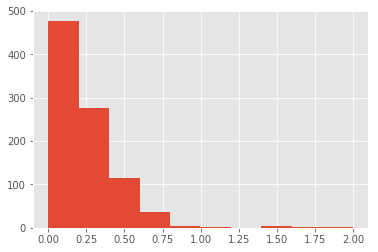

In [70]:
plt.style.use('ggplot')
plt.hist(ld50_std_only['std'])

In [71]:
np.random.seed(42)
std_devs, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(ld50_std_only['std'], replace = True, size = len(ld50_std_only['std']))
    sample_std = np.std(temp_sample)
    std_devs.append(sample_std)
    
boot_mean = np.mean(std_devs)
boot_95_CI = np.percentile(std_devs, [2.5, 97.5])

print('Bootstrapped mean std = {}, 95% CI = {}'.format(boot_mean, boot_95_CI))

Bootstrapped mean std = 0.21776970751539387, 95% CI = [0.18903149 0.24918242]


### Comparing with analytical way of computing CI for sample mean using t-distribution

In [72]:
from scipy import stats
import numpy as np

np.random.seed(42)

#arr = np.random.normal(loc=74, scale=4.3, size=20)

alpha = 0.05                       # significance level = 5%
df = len(std_devs) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
s = np.std(std_devs, ddof=1)            # sample standard deviation = 2.502
n = len(std_devs)


lower = np.mean(std_devs) - (t * s / np.sqrt(n))
upper = np.mean(std_devs) + (t * s / np.sqrt(n))

In [73]:
lower, upper

(0.21746652648301193, 0.21807288854777582)

(array([  55.,  369., 1351., 2501., 2732., 1855.,  822.,  272.,   39.,
           4.]),
 array([0.17006884, 0.18117884, 0.19228883, 0.20339883, 0.21450883,
        0.22561883, 0.23672882, 0.24783882, 0.25894882, 0.27005881,
        0.28116881]),
 <a list of 10 Patch objects>)

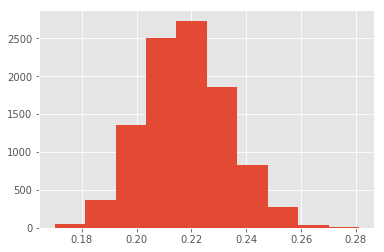

In [74]:
plt.hist(std_devs)

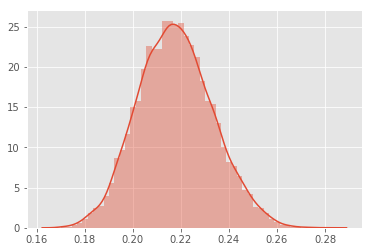

In [76]:

sns.distplot(std_devs)
plt.savefig(figures_dir+'hist_bootstdevs.png', dpi = 300)

#### g = ld50_var_MW.groupby('CAS').filter(lambda x: len(x['pLD50']) >= 3)

In [77]:
np.std(g['pLD50'])

0.9004316086438419

### Comparing with original workshop

In [78]:
agnes = ld50_var.groupby('CAS').filter(lambda x: len(x['LD50_LOGmgkg']) >= 3)

In [79]:
np.std(agnes['LD50_LOGmgkg'], ddof = 1)

0.8299219706819485

In [80]:
np.mean(agnes['LD50_LOGmgkg'])

2.970475581146746

In [81]:
len(agnes['LD50_LOGmgkg'])

5544

In [82]:
2.970475581146746+(1.96*(0.8298471186438543/(5544**0.5)))

2.992320103397974

In [83]:
agnes_std = agnes.groupby(['CAS'], as_index = True).agg({'LD50_LOGmgkg': 'std'})

In [84]:
agnes_std = agnes_std.reset_index()

In [85]:
agnes_std.columns = ['CAS', 'std_LD50_LOGmgkg']

In [86]:
#agnes_std

In [87]:
np.random.seed(42)
agstd_devs, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(agnes_std['std_LD50_LOGmgkg'], replace = True, size = len(agnes_std['std_LD50_LOGmgkg']))
    sample_std = np.std(temp_sample)
    agstd_devs.append(sample_std)
    
aboot_mean = np.mean(agstd_devs)
aboot_95_CI = np.percentile(agstd_devs, [2.5, 97.5])

print('Bootstrapped mean std = {}, 95% CI = {}'.format(aboot_mean, aboot_95_CI))

Bootstrapped mean std = 0.21999753863416285, 95% CI = [0.19458974 0.24673953]


In [88]:
aboot_mean*1.96

0.4311951757229592

(array([  88.,  520., 1692., 2758., 2653., 1574.,  572.,  116.,   23.,
           4.]),
 array([0.17958195, 0.18965153, 0.19972111, 0.20979069, 0.21986027,
        0.22992985, 0.23999943, 0.25006901, 0.26013859, 0.27020817,
        0.28027774]),
 <a list of 10 Patch objects>)

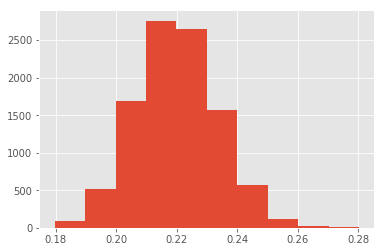

In [89]:
plt.hist(agstd_devs)

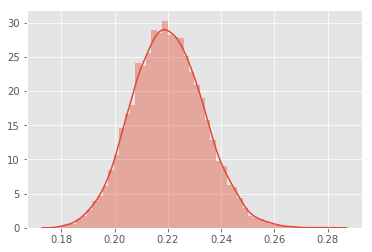

In [90]:
sns.distplot(agstd_devs)

In [91]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(std_devs, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(std_devs, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 18.9% and 24.9%


In [92]:
from scipy import stats
import numpy as np

np.random.seed(42)

#arr = np.random.normal(loc=74, scale=4.3, size=20)

alpha = 0.05                       # significance level = 5%
df = len(std_devs) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
s = np.std(std_devs, ddof=1)            # sample standard deviation = 2.502
n = len(std_devs)
a = (t * s / np.sqrt(n))
lower = np.mean(std_devs) - a
upper = np.mean(std_devs) + a

#### Refamiliarising with t-distribution and computing of CIs

https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#conf_int_of_mean

In [93]:
test = np.array([78000, 90000, 75000, 117000, 105000, 96000, 89500, 102300, 80000])

In [94]:
alpha = 0.05                       # significance level = 5%
df = len(test) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
s = np.std(test, ddof=1)            # sample standard deviation = 2.502
n = len(test)

lower = np.mean(test) - (t * s / np.sqrt(n))
upper = np.mean(test) + (t * s / np.sqrt(n))
print(lower)
print(upper)
print(t)

81824.33631056547
103242.33035610119
2.3060041350333704


In [95]:
lower + np.mean(test)

174357.6696438988

In [96]:
upper - np.mean(test)

10708.997022767857

In [97]:
dist = (t * s / np.sqrt(n))
print(dist)

10708.997022767853


In [98]:
ld50_var_MW.head()

,CAS,DTXSID,name,pLD50,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,average_mass,qsar_ready_smiles,smiles
0,50782-69-9,DTXSID80866161,VX,7.347931,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,267.37,CCOP(C)(=O)SCCN(C(C)C)C(C)C,CCOP(C)(=O)SCCN(C(C)C)C(C)C
1,316-42-7,DTXSID7020558,Emetine dihydrochloride,7.663991,LD50_value,-1.920819,0.012,pt_est,experimental value,CAS-RN,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...
2,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.206772,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
3,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.165379,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
4,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",6.874333,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl


In [99]:
g = ld50_var_MW.groupby(['CAS']).filter(lambda x: len(x['pLD50']) >= 3)

In [100]:
#g

In [101]:
a_calls = {}
for i, group in g.groupby(['CAS']):
    key = [n for n in group['CAS'] if n !=' '][0]
    value = list(group['pLD50'])
    a_calls[key] =value

In [102]:
#a_calls
my_dict = dict(list(a_calls.items())[0:200])

Text(0,0.5,'pLD50')

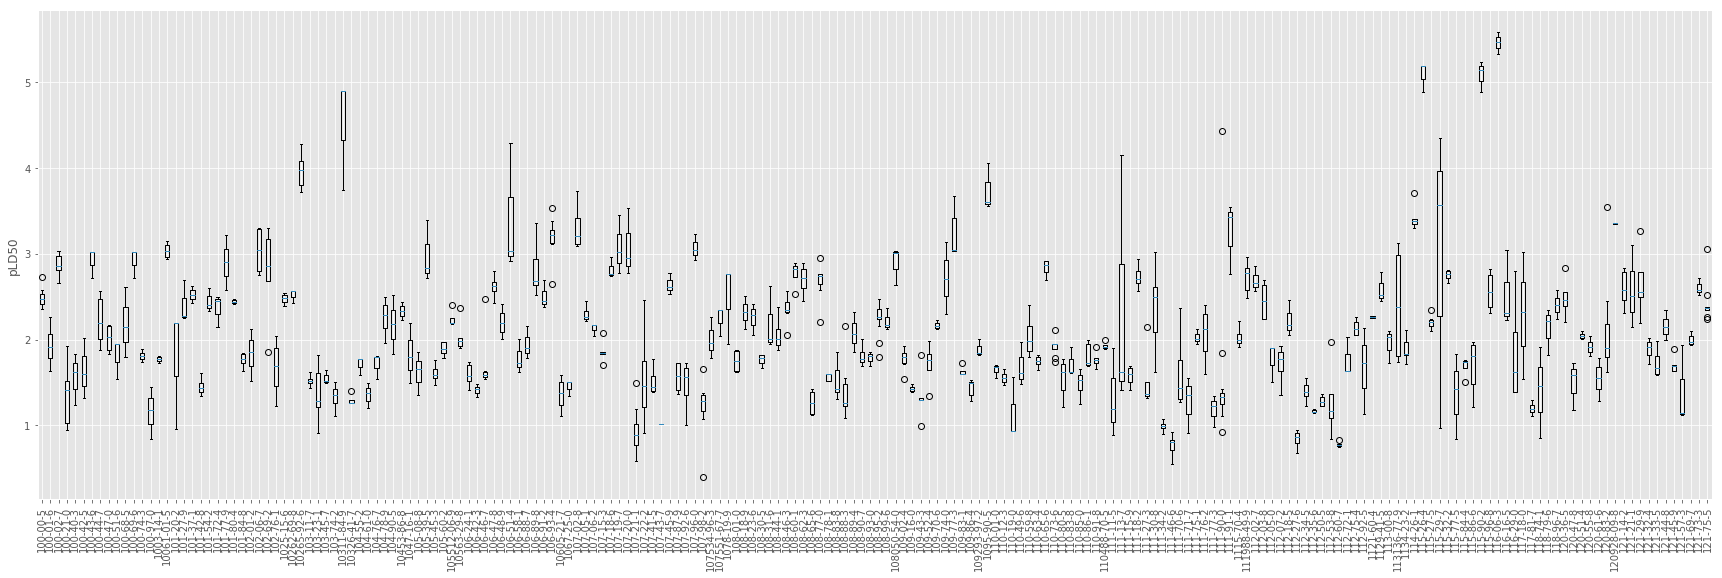

In [103]:
fig, ax = plt.subplots(figsize = (30,9))
labels, data = [*zip(*my_dict.items())]
ax.boxplot(data)
plt.xticks(range(1, len(labels) +1), labels, rotation = 'vertical')
plt.ylabel('pLD50')

In [104]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index]
     

In [105]:
df_new = boxplot_sorted(g, 'CAS', 'pLD50', rot = 90)

In [106]:
#df_new.iloc[:,:200].tail()


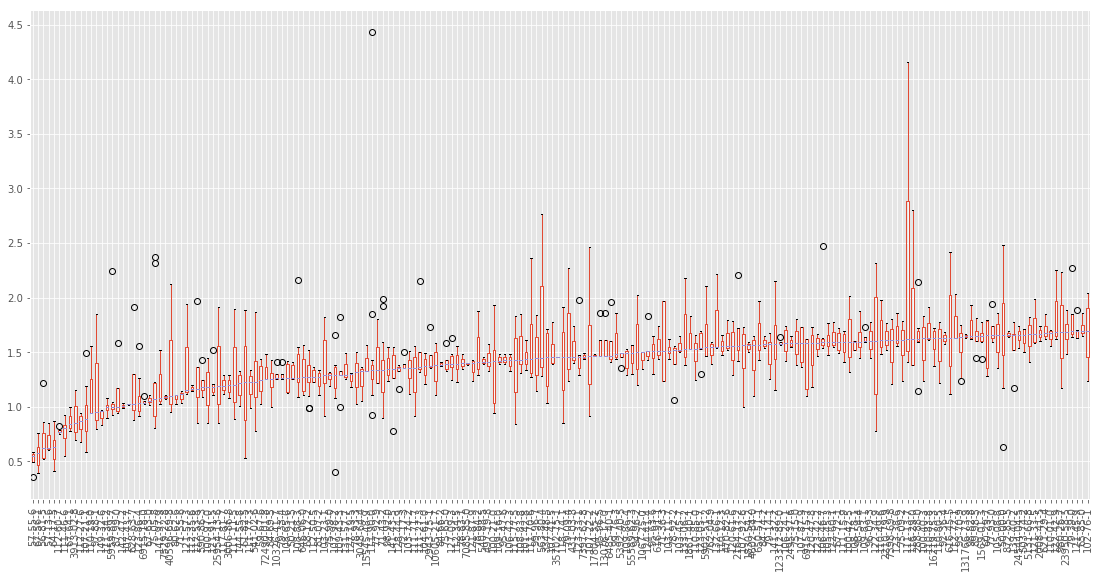

In [107]:
plt.figure(figsize = (19,9))
df_new.iloc[:,:200].boxplot(rot=90, return_type="axes")


In [118]:
test_ggplot = pd.merge(g,df_medians, on = 'CAS', how = 'left')

In [152]:
test_ggplot.head()

,CAS,DTXSID,name,pLD50,LD50_type,LD50_LOGmgkg,LD50_mgkg,val_code,test_type,found_by,average_mass,qsar_ready_smiles,smiles,medianpLD50,upper_CI,lower_CI
0,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.206772,LD50_value,-1.698970,0.020,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.019856,7.269039,6.830825
1,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",7.165379,LD50_value,-1.657577,0.022,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.019856,7.269039,6.830825
2,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",6.874333,LD50_value,-1.366532,0.043,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.019856,7.269039,6.830825
3,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",6.854589,LD50_value,-1.346787,0.045,pt_est,experimental value,CAS-RN,321.96,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl,7.019856,7.269039,6.830825
4,82-66-6,DTXSID4032378,Diphacinone,6.054840,LD50_min,-0.522879,0.300,lmt_tst,limit test (min; greater than),CAS-RN,340.378,O=C(C(C1=CC=CC=C1)C1=CC=CC=C1)C1C(=O)C2=C(C=CC...,O=C(C(C1=CC=CC=C1)C1=CC=CC=C1)C1C(=O)C2=C(C=CC...,5.355870,5.605053,5.166839


In [153]:
g201 =test_ggplot.iloc[:200,:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

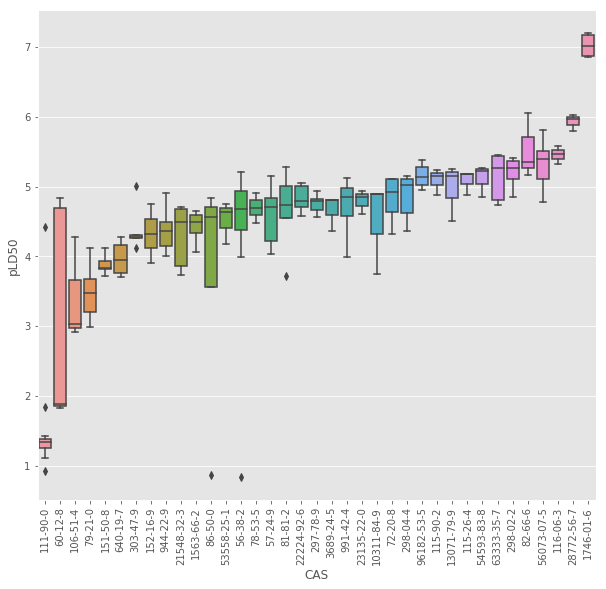

In [146]:
g200= g.iloc[:200,:]
grouped = g200.groupby("CAS")
sorted_median = pd.DataFrame({col:vals['pLD50'] for col,vals in grouped}).median().sort_values(ascending=True)
ax = sns.boxplot(x = 'CAS', y = 'pLD50', data = g200, order =sorted_median.index)
#for patch in ax.artists:
#    r,g,b,a = patch.get_facecolor()
#    patch.set_facecolor((r,g,b,0.3))
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation =90)

In [150]:
from ggplot import *

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

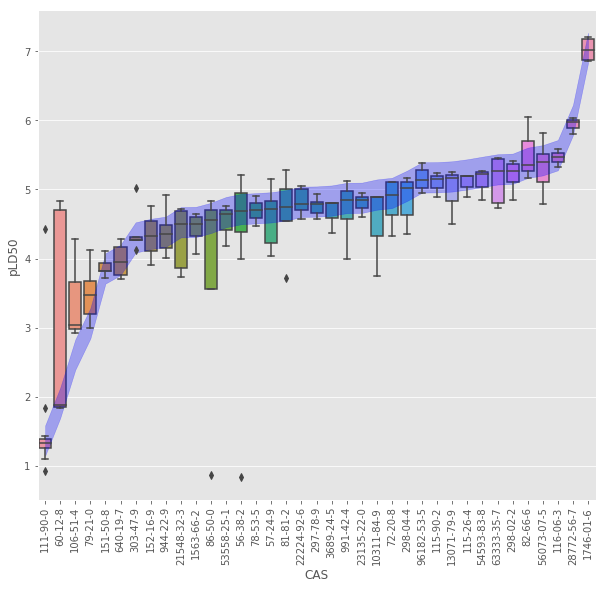

In [168]:
plt.figure(figsize = (10,9))
grouped = g201.groupby("CAS")
sorted_median = pd.DataFrame({col:vals['pLD50'] for col,vals in grouped}).median().sort_values(ascending=True)
ax = sns.boxplot(x = 'CAS', y = 'pLD50', data = g201, order =sorted_median.index)
ggplot(g201, aes(x = 'CAS', y = 'pLD50')) + geom_ribbon(aes(ymin = 'lower_CI', ymax = 'upper_CI', group = 1), fill = "#bb0000", alpha = 0.3)
ax.fill_between(g201['CAS'], g201['lower_CI'], g201['upper_CI'],color = 'b', alpha =0.3)

#for patch in ax.artists:
#    r,g,b,a = patch.get_facecolor()
#    patch.set_facecolor((r,g,b,0.3))
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(rotation =90)

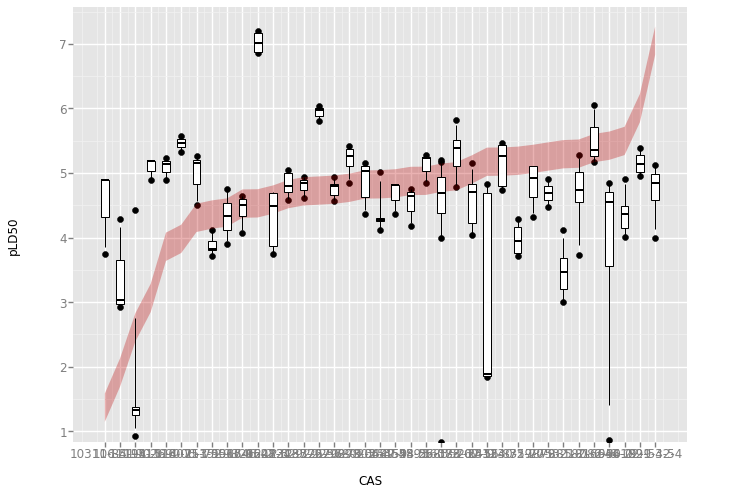

<ggplot: (8753446187044)>

In [161]:
ggplot(g201, aes(x = 'CAS', y = 'pLD50')) + geom_boxplot() + geom_ribbon(aes(ymin = 'lower_CI', ymax = 'upper_CI', group = 1), fill = "#bb0000", alpha = 0.3)

In [108]:
b_calls = {}
for i, group in g.groupby(['CAS']):
    key = [n for n in group['CAS'] if n !=' '][0]
    s = np.array(list(group['pLD50']))
    value = np.median(s)
    b_calls[key] =value

In [109]:
df_medians = pd.DataFrame(list(b_calls.items()), columns = ['CAS', 'medianpLD50'])

In [110]:
df_medians.head()

,CAS,medianpLD50
0,100-00-5,2.473143
1,100-01-6,1.915151
2,100-02-7,2.862325
3,100-21-0,1.414273
4,100-40-3,1.625414


In [111]:
df_medians['upper_CI'] = df_medians['medianpLD50'] + boot_95_CI[1]
df_medians['lower_CI'] = df_medians['medianpLD50'] - boot_95_CI[0]

In [116]:
df_medians.head()

,CAS,medianpLD50,upper_CI,lower_CI
0,100-00-5,2.473143,2.722325,2.284111
1,100-01-6,1.915151,2.164333,1.726119
2,100-02-7,2.862325,3.111507,2.673293
3,100-21-0,1.414273,1.663456,1.225242
4,100-40-3,1.625414,1.874597,1.436383


In [113]:
test_medians = df_medians.head(200)

Text(0,0.5,'pLD50')

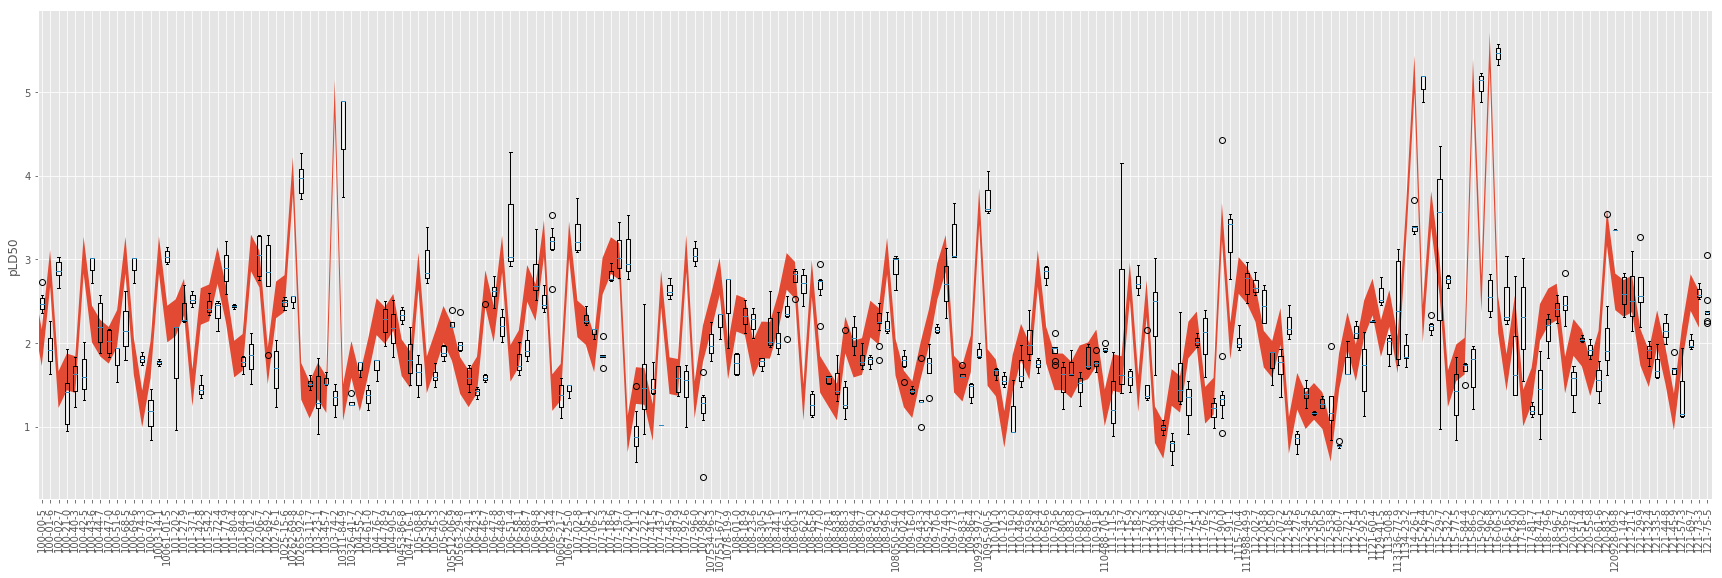

In [114]:
fig, ax = plt.subplots(figsize = (30,9))
labels, data = [*zip(*my_dict.items())]
ax.boxplot(data)
ax.fill_between(test_medians['CAS'], test_medians['lower_CI'], test_medians['upper_CI'])
plt.xticks(range(1, len(labels) +1), labels, rotation = 'vertical')
plt.ylabel('pLD50')

### Taking the acute processed data and filtering for where there is a known LD50 point estimate

In [136]:
relevant_acute = acute_proc[~acute_proc['known_LD50_mgkg'].isnull()]

### TEST number of substances for which a consensus prediction is available

In [137]:
TEST_all[~TEST_all['pred_LD50_Con'].isnull()].shape

(10022, 5)

### TIMES number of substances for which a prediction is possible

### TIMES pred_LD50 'Not predicted has trailing white space

In [138]:
TIMES_all['pred_LD50'] = [e.strip() for e in TIMES_all['pred_LD50']]

In [139]:
TIMES_all[(TIMES_all['pred_LD50'] != 'Not predicted') & (TIMES_all['pred_LD50'] != 'Inorganic')]['CAS'].nunique()

2458

### TEST substance for which a consensus prediction is available and which is not in the training set

In [140]:
TEST_temp = TEST_all[~TEST_all['pred_LD50_Con'].isnull()]

In [141]:
TEST_temp = TEST_temp[TEST_temp['known_LD50'].isnull()]

In [142]:
TEST_temp = TEST_temp[[ 'CAS', 'pred_LD50_Con', 'known_LD50']]

In [143]:
TEST_temp.shape

(3927, 3)

### TIMES substance for which a prediction is available and which is not in the training set

In [144]:
TIMES_temp = TIMES_all[(TIMES_all['pred_LD50'] != 'Not predicted') & (TIMES_all['pred_LD50'] != 'Inorganic')]

In [145]:
TIMES_temp = TIMES_temp[TIMES_temp['known_LD50'] == 'no data']

### Merging dataframes to include all acute experimental data along with TIMES and TEST predictions and MW information into one dataframe

In [146]:
relevant_acute.columns

Index(['CAS', 'very_toxic', 'nontoxic', 'known_LD50_mgkg', 'EPA_category',
       'GHS_category'],
      dtype='object')

In [147]:
TEST_temp = TEST_temp[ ['CAS', 'pred_LD50_Con']]

In [148]:
temp_ = pd.merge(relevant_acute, TEST_temp, on = 'CAS', how = 'left')

In [149]:
temp_ = temp_[['CAS', 'known_LD50_mgkg', 'pred_LD50_Con']]

In [150]:
temp_.columns = ['CAS', 'known_LD50_mgkg', 'TEST_LD50_molkg']

In [151]:
TIMES_temp.columns = ['CAS', 'chem_name', 'Smiles', 'predicted_toxicological_category',
       'known_LD50_TIMES', 'TIMES_LD50_mgkg', 'acute_oral_toxicity_confidence',
       'molecular_initiating_event_1', 'effect_biological_outcome_1',
       'molecular_initiating_event_2', 'effect_biological outcome_2',
       'molecular_initiating_event_3', 'effect_biological outcome_3',
       'alert_reliability', 'parameter_ranges',
       'correct_fragments_structural_domain',
       'incorrect_fragments_structural_domain',
       'unknown_fragments_structural_domain', 'total_structural_domain',
       'total_domain', 'Remark']

In [152]:
TIMES_temp = TIMES_temp[['CAS', 'chem_name', 'predicted_toxicological_category',
       'TIMES_LD50_mgkg', 'acute_oral_toxicity_confidence',
       'molecular_initiating_event_1', 'effect_biological_outcome_1',
       'molecular_initiating_event_2', 'effect_biological outcome_2',
       'molecular_initiating_event_3', 'effect_biological outcome_3',
       'alert_reliability', 'parameter_ranges',
       'correct_fragments_structural_domain',
       'incorrect_fragments_structural_domain',
       'unknown_fragments_structural_domain', 'total_structural_domain',
       'total_domain', 'Remark']]

In [153]:
temp_1 = pd.merge(temp_, TIMES_temp, on = 'CAS', how = 'left')

In [154]:
relevant_acute_pred = pd.merge(temp_1, MW_all, on = 'CAS', how = 'left')

In [155]:
relevant_acute_pred[~relevant_acute_pred['TEST_LD50_molkg'].isnull()].head()

,CAS,known_LD50_mgkg,TEST_LD50_molkg,chem_name,predicted_toxicological_category,TIMES_LD50_mgkg,acute_oral_toxicity_confidence,molecular_initiating_event_1,effect_biological_outcome_1,molecular_initiating_event_2,...,unknown_fragments_structural_domain,total_structural_domain,total_domain,Remark,found_by,DTXSID,name,average_mass,qsar_ready_smiles,smiles
7,100-21-0,1960.0,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CAS-RN,DTXSID6026080,Terephthalic acid,166.132,OC(=O)C1=CC=C(C=C1)C(O)=O,OC(=O)C1=CC=C(C=C1)C(O)=O
19,100-47-0,700.0,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CAS-RN,DTXSID7021491,Benzonitrile,103.124,N#CC1=CC=CC=C1,N#CC1=CC=CC=C1
25,100-61-8,716.0,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CAS-RN,DTXSID9021841,N-Methylaniline,107.156,CNC1=CC=CC=C1,CNC1=CC=CC=C1
40,100-95-8,100.0,2.84,DTXSID20878647,Aliphatic and arylaliphatic amines,1250,from 322 to 4880,"Formation of reactive metabolites: aldehydes, ...",Formation of protein adducts,NaN,...,42.86%,Out of domain,Out of Domain,,CAS-RN,DTXSID20878647,Dodecarbonium Chloride,397.04,CCCCCCCCCCCCNC(=O)C[N+](C)(C)CC1=CC=CC=C1,[Cl-].CCCCCCCCCCCCNC(=O)C[N+](C)(C)CC1=CC=CC=C1
41,100-97-0,9200.0,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CAS-RN,DTXSID6020692,Methenamine,140.19,C1N2CN3CN1CN(C2)C3,C1N2CN3CN1CN(C2)C3


### Create new columns to convert TIMES and expt LD50 into the same units as TEST predictions - so that they are all consistent with each other in molkg

In [156]:
relevant_acute_pred['known_pLD50'] = -np.log10(relevant_acute_pred['known_LD50_mgkg']/relevant_acute_pred['average_mass'].astype(float)/1000)

### Chasing issues with TIMES dataset - all values are strings!

In [157]:
#[e for e in relevant_acute_pred[~relevant_acute_pred['TIMES_LD50_mgkg'].isnull()]['TIMES_LD50_mgkg']]

In [158]:
relevant_acute_pred['TIMES_LD50_mgkg'] = relevant_acute_pred['TIMES_LD50_mgkg'].apply(pd.to_numeric, errors = 'coerce')

### Add pLD50 and mgkg for both prediction systems TEST and TIMES

In [159]:
relevant_acute_pred['TIMES_pLD50'] = -np.log10(relevant_acute_pred['TIMES_LD50_mgkg']/relevant_acute_pred['average_mass'].astype(float)/1000)

In [160]:
relevant_acute_pred.rename(columns = {'TEST_LD50_molkg': 'TEST_pLD50'}, inplace = True)

In [161]:
relevant_acute_pred['TEST_LD50_mgkg'] = 10**(-relevant_acute_pred['TEST_pLD50'])*relevant_acute_pred['average_mass'].astype(float)*1000

In [162]:
relevant_acute_pred['known_pLD50_minus_TEST'] = relevant_acute_pred['known_pLD50'] - relevant_acute_pred['TEST_pLD50']

relevant_acute_pred['known_pLD50_minus_TIMES'] = relevant_acute_pred['known_pLD50'] - relevant_acute_pred['TIMES_pLD50']


### Testing to mimic Nelms code with CI

In [163]:
TIMES_lst = []
for e in relevant_acute_pred['known_pLD50_minus_TIMES']:
    if e > 0.427:
        TIMES_lst.append('Above_CI')
    elif e < -0.427:
        TIMES_lst.append('Below_CI')
    elif (e < 0.427) & (e > -0.427):
        TIMES_lst.append('Within_CI')
    else:
        TIMES_lst.append('NA')

relevant_acute_pred['TIMES'] = TIMES_lst


In [164]:
relevant_acute_pred['TIMES'].value_counts()

NA           8476
Within_CI     309
Above_CI      116
Below_CI       78
Name: TIMES, dtype: int64

In [165]:
TIMES_lst = []
for e in relevant_acute_pred['known_pLD50_minus_TIMES']:
    if e > boot_95_CI[1]:
        TIMES_lst.append('Above_CI')
    elif e < -boot_95_CI[1]:
        TIMES_lst.append('Below_CI')
    elif (e < boot_95_CI[1]) & (e > -boot_95_CI[1]):
        TIMES_lst.append('Within_CI')
    else:
        TIMES_lst.append('NA')

relevant_acute_pred['TIMES'] = TIMES_lst

In [166]:
relevant_acute_pred['TIMES'].value_counts()

NA           8476
Within_CI     191
Above_CI      171
Below_CI      141
Name: TIMES, dtype: int64

In [167]:
TEST_lst = []
for e in relevant_acute_pred['known_pLD50_minus_TEST']:
    if e > boot_95_CI[1]:
        TEST_lst.append('Above_CI')
    elif e < -boot_95_CI[1]:
        TEST_lst.append('Below_CI')
    elif (e < boot_95_CI[1]) & (e > -boot_95_CI[1]):
        TEST_lst.append('Within_CI')
    else:
        TEST_lst.append('NA')

relevant_acute_pred['TEST'] = TEST_lst

In [168]:
relevant_acute_pred['TEST'].value_counts()

NA           7360
Within_CI     588
Above_CI      555
Below_CI      476
Name: TEST, dtype: int64

In [169]:
relevant_acute_pred['TEST'] = relevant_acute_pred['TEST'].replace('NA', np.nan)

In [170]:
relevant_acute_pred['TIMES'] = relevant_acute_pred['TIMES'].replace('NA', np.nan)

In [171]:
relevant_acute_pred['TIMES'].value_counts(normalize = True)

Within_CI    0.379722
Above_CI     0.339960
Below_CI     0.280318
Name: TIMES, dtype: float64

In [172]:
relevant_acute_pred['TEST'].value_counts(normalize = True)

Within_CI    0.363187
Above_CI     0.342804
Below_CI     0.294009
Name: TEST, dtype: float64

In [173]:
relevant_acute_pred.head()

,CAS,known_LD50_mgkg,TEST_pLD50,chem_name,predicted_toxicological_category,TIMES_LD50_mgkg,acute_oral_toxicity_confidence,molecular_initiating_event_1,effect_biological_outcome_1,molecular_initiating_event_2,...,average_mass,qsar_ready_smiles,smiles,known_pLD50,TIMES_pLD50,TEST_LD50_mgkg,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,TIMES,TEST
0,100-00-5,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.55,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1,2.534661,NaN,NaN,NaN,NaN,NaN,NaN
1,100-01-6,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.126,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O,2.265214,NaN,NaN,NaN,NaN,NaN,NaN
2,100-02-7,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,139.11,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O,2.912909,NaN,NaN,NaN,NaN,NaN,NaN
3,100-06-1,1720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.177,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O,1.941075,NaN,NaN,NaN,NaN,NaN,NaN
4,100-14-1,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.58,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1,1.977028,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
relevant_acute_pred_final = relevant_acute_pred[['DTXSID', 'CAS', 'name','known_LD50_mgkg', 'known_pLD50','TEST_LD50_mgkg','TEST_pLD50', 
        'TIMES_LD50_mgkg','TIMES_pLD50','TIMES', 'TEST', 'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES','average_mass','qsar_ready_smiles', 'smiles',
       'predicted_toxicological_category', 'molecular_initiating_event_1',
       'effect_biological_outcome_1', 'molecular_initiating_event_2',
       'effect_biological outcome_2', 'molecular_initiating_event_3',
       'effect_biological outcome_3', 'alert_reliability', 'parameter_ranges',
       'correct_fragments_structural_domain',
       'incorrect_fragments_structural_domain',
       'unknown_fragments_structural_domain', 'total_structural_domain',
       'total_domain', 'acute_oral_toxicity_confidence'     
       ]]

In [176]:
#relevant_acute_pred_final.to_csv('/share/home3/gpatlewi/python/acute_nelms/output/relevant_acute_pred_final_200320.csv')

In [177]:
relevant_acute_pred_final.head()

,DTXSID,CAS,name,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,TIMES,...,molecular_initiating_event_3,effect_biological outcome_3,alert_reliability,parameter_ranges,correct_fragments_structural_domain,incorrect_fragments_structural_domain,unknown_fragments_structural_domain,total_structural_domain,total_domain,acute_oral_toxicity_confidence
0,DTXSID5020281,100-00-5,1-Chloro-4-nitrobenzene,460.0,2.534661,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID8020961,100-01-6,4-Nitroaniline,750.0,2.265214,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID0021834,100-02-7,4-Nitrophenol,170.0,2.912909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID2044347,100-06-1,4'-Methoxyacetophenone,1720.0,1.941075,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID4025745,100-14-1,4-Nitrobenzyl chloride,1809.0,1.977028,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
writer = pd.ExcelWriter(processed_dat_dir+'relevant_acute_pred_final_200320.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
relevant_acute_pred_final.to_excel(writer, sheet_name='relevant_pred')


writer.save()

In [178]:
xls = pd.ExcelFile(processed_dat_dir+'relevant_acute_pred_final_200320.xlsx')

In [179]:
xls.sheet_names

['relevant_pred']

In [180]:
relevant_acute_data = xls.parse('relevant_pred')

In [181]:
relevant_acute_data.shape

(8979, 31)

In [182]:
relevant_acute_data.describe()

,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,average_mass
count,8979.000000,8174.000000,1619.000000,1621.000000,503.000000,503.000000,1619.000000,503.000000,8174.000000
mean,2269.640335,2.549025,1820.165401,2.441579,1925.843956,2.595833,0.071890,0.072379,261.188284
std,4180.094054,0.888440,2510.520155,0.549733,2300.756523,0.814640,0.638198,0.616242,126.582537
min,0.012000,0.291207,1.076490,0.860000,2.740000,1.325743,-2.973942,-2.659323,30.026000
25%,250.000000,1.927926,562.610873,2.090000,358.000000,2.067518,-0.311428,-0.291701,168.705000
50%,916.000000,2.411907,1086.111220,2.430000,978.000000,2.458520,0.025733,0.033424,244.334500
75%,2500.000000,3.007805,2115.977196,2.750000,2890.000000,2.777997,0.413016,0.382991,327.810000
max,70000.000000,7.663991,39977.708638,5.560000,18200.000000,5.050399,5.263991,3.708353,1440.900000


In [183]:
relevant_acute_data['CAS'].count()

8979

### Dummy data to test out creation of ablines in matplotlib

In [184]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

Text(0.5,1,'1.2142857142857146')

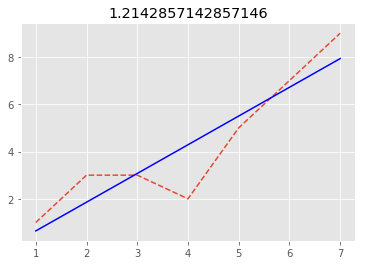

In [185]:
# Some dummy data
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 3, 2, 5, 7, 9]

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'b')
plt.title(slope)

In [186]:
relevant_acute_data.describe()

,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,average_mass
count,8979.000000,8174.000000,1619.000000,1621.000000,503.000000,503.000000,1619.000000,503.000000,8174.000000
mean,2269.640335,2.549025,1820.165401,2.441579,1925.843956,2.595833,0.071890,0.072379,261.188284
std,4180.094054,0.888440,2510.520155,0.549733,2300.756523,0.814640,0.638198,0.616242,126.582537
min,0.012000,0.291207,1.076490,0.860000,2.740000,1.325743,-2.973942,-2.659323,30.026000
25%,250.000000,1.927926,562.610873,2.090000,358.000000,2.067518,-0.311428,-0.291701,168.705000
50%,916.000000,2.411907,1086.111220,2.430000,978.000000,2.458520,0.025733,0.033424,244.334500
75%,2500.000000,3.007805,2115.977196,2.750000,2890.000000,2.777997,0.413016,0.382991,327.810000
max,70000.000000,7.663991,39977.708638,5.560000,18200.000000,5.050399,5.263991,3.708353,1440.900000


In [187]:
relevant_acute_data[(relevant_acute_data['TEST_LD50_mgkg'].isnull()) & (~relevant_acute_data['TEST_pLD50'].isnull()) ]

,DTXSID,CAS,name,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,TIMES,...,molecular_initiating_event_3,effect_biological outcome_3,alert_reliability,parameter_ranges,correct_fragments_structural_domain,incorrect_fragments_structural_domain,unknown_fragments_structural_domain,total_structural_domain,total_domain,acute_oral_toxicity_confidence
3667,NaN,29387-86-8,NaN,1900.0,NaN,NaN,1.29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4639,NaN,39699-08-6,NaN,29000.0,NaN,NaN,1.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
relevant_acute_data_filt = relevant_acute_data[['DTXSID', 'CAS', 'name', 'known_LD50_mgkg', 'known_pLD50',
       'TEST_LD50_mgkg', 'TEST_pLD50', 'TIMES_LD50_mgkg', 'TIMES_pLD50',
       'TIMES', 'TEST', 'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES',
       'average_mass', 'qsar_ready_smiles', 'smiles']]

In [189]:
TEST_vs_expt_pLD50 = relevant_acute_data_filt[(~relevant_acute_data_filt['DTXSID'].isnull()) & (~relevant_acute_data_filt['TEST_pLD50'].isnull())]

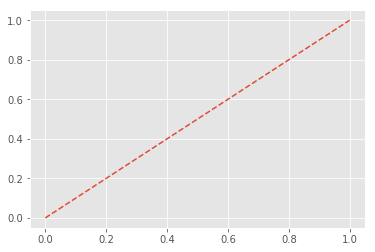

In [190]:
abline(1,0)

In [191]:
TEST_vs_expt_pLD50['TEST'].unique()

array(['Above_CI', 'Within_CI', 'Below_CI'], dtype=object)

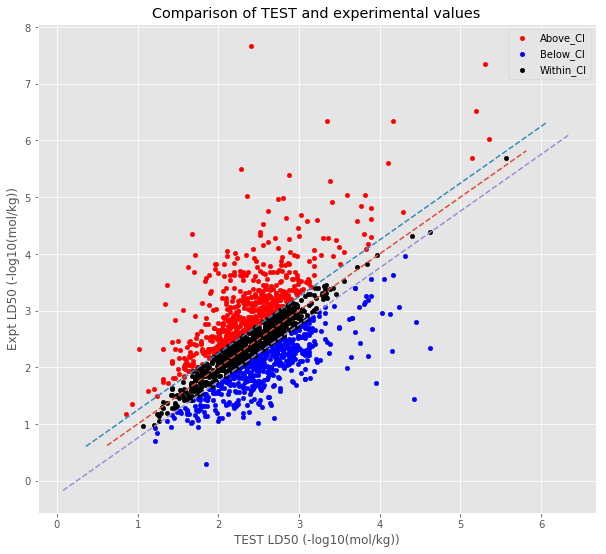

In [192]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = TEST_vs_expt_pLD50.groupby('TEST')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TEST and experimental values')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TEST_vs_actual_all.png', dpi = 300)

In [ ]:
#0.24673953

In [194]:
TIMES_vs_expt_pLD50 = relevant_acute_data_filt[(~relevant_acute_data_filt['DTXSID'].isnull()) & (~relevant_acute_data_filt['TIMES_pLD50'].isnull())]

Text(0,0.5,'Expt LD50 (-log10(mol/kg))')

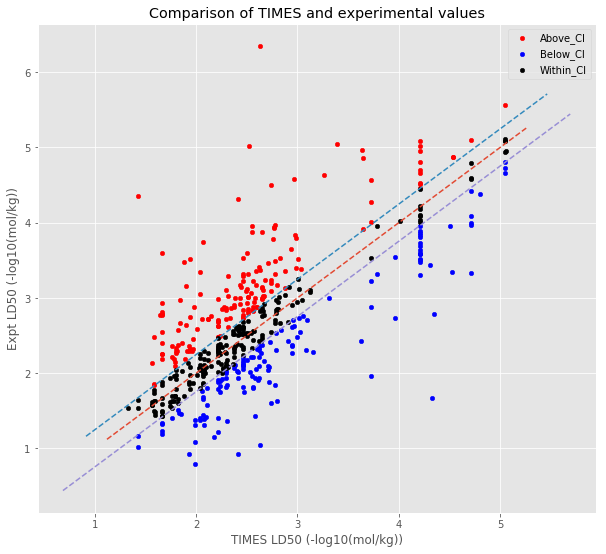

In [195]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = TIMES_vs_expt_pLD50.groupby('TIMES')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TIMES and experimental values')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TIMES_vs_actual_all.png', dpi = 300)

In [196]:
TEST_vs_expt_pLD50.columns

Index(['DTXSID', 'CAS', 'name', 'known_LD50_mgkg', 'known_pLD50',
       'TEST_LD50_mgkg', 'TEST_pLD50', 'TIMES_LD50_mgkg', 'TIMES_pLD50',
       'TIMES', 'TEST', 'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES',
       'average_mass', 'qsar_ready_smiles', 'smiles'],
      dtype='object')

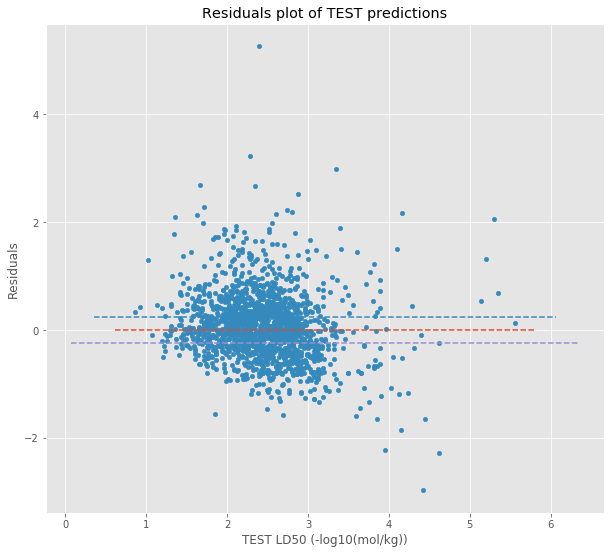

In [206]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
TEST_vs_expt_pLD50.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50_minus_TEST')
abline(0,0)
abline(0,0.24673953)
abline(0,-0.24673953)
plt.title('Residuals plot of TEST predictions')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Residuals')
plt.savefig(figures_dir+'residuals_TEST.png', dpi = 300)

In [205]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['known_pLD50_minus_TIMES'] >2.5]

,DTXSID,CAS,name,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,TIMES,TEST,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,average_mass,qsar_ready_smiles,smiles
2680,DTXSID4044870,2082-81-7,"Butane-1,4-diyl bis(2-methylprop-2-enoate)",10.066,4.351774,4837.609579,1.67,8410.0,1.429835,Above_CI,Above_CI,2.681774,2.921939,226.272,CC(=C)C(=O)OCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCCCOC(=O)C(C)=C
5261,DTXSID1022976,513-10-0,Echothiophate,0.174,6.342910,171.182553,3.35,889.0,2.634558,Above_CI,Above_CI,2.992910,3.708353,383.230,CCOP(=O)(OCC)SCC[N+](C)(C)C,[I-].CCOP(=O)(OCC)SCC[N+](C)(C)C


In [228]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['TIMES_pLD50'] >4]['TIMES'].value_counts(normalize =  True)

Below_CI     0.500000
Within_CI    0.275862
Above_CI     0.224138
Name: TIMES, dtype: float64

In [226]:
TIMES_vs_expt_pLD50[TIMES_vs_expt_pLD50['TIMES_pLD50'] >4]

,DTXSID,CAS,name,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,TIMES,TEST,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,average_mass,qsar_ready_smiles,smiles
174,DTXSID80144173,10176-39-3,Gitoformate,39.010,4.379648,22.429711,4.62,14.80,4.800562,Below_CI,Within_CI,-0.240352,-0.420914,935.026,CC1OC(CC(OC(C)=O)C1OC=O)OC1C(C)OC(CC1OC=O)OC1C...,C[C@H]1O[C@H](C[C@H](OC(C)=O)[C@@H]1OC=O)O[C@@...
1087,DTXSID3041875,122-10-1,Dimethyl 3-hydroxyglutaconate dimethyl phosphate,31.000,3.959172,NaN,NaN,8.92,4.500169,Below_CI,NaN,NaN,-0.540997,282.185,COC(=O)CC(OP(=O)(OC)OC)=CC(=O)OC,COC(=O)CC(OP(=O)(OC)OC)=CC(=O)OC
1317,DTXSID70926647,13025-69-9,"1-(2-Chloroethyl)-1,1-dimethylhydrazin-1-ium c...",3400.000,1.670055,NaN,NaN,7.45,4.329377,Below_CI,NaN,NaN,-2.659323,159.050,C[N+](C)(N)CCCl,[Cl-].C[N+](C)(N)CCCl
1359,DTXSID7021156,13171-21-6,Phosphamidon,8.000,4.573582,NaN,NaN,5.84,4.710259,Within_CI,NaN,NaN,-0.136677,299.690,CCN(CC)C(=O)C(Cl)=C(C)OP(=O)(OC)OC,CCN(CC)C(=O)C(Cl)=C(C)OP(=O)(OC)OC
1657,DTXSID40161482,14086-35-2,Fenthion oxon sulfone,30.000,3.991610,NaN,NaN,5.74,4.709819,Below_CI,NaN,NaN,-0.718209,294.260,COP(=O)(OC)OC1=CC(C)=C(C=C1)S(C)(=O)=O,COP(=O)(OC)OC1=CC(C)=C(C=C1)S(C)(=O)=O
1670,DTXSID9023914,141-66-2,Dicrotophos,9.000,4.420858,NaN,NaN,4.62,4.710458,Below_CI,NaN,NaN,-0.289601,237.192,COP(=O)(OC)OC(C)=CC(=O)N(C)C,COP(=O)(OC)O\C(C)=C\C(=O)N(C)C
1678,DTXSID80161729,14143-09-0,"Phosphoric acid, diethyl 3-methyl-4-(methylsul...",8.128,4.598290,NaN,NaN,6.28,4.710314,Within_CI,NaN,NaN,-0.112024,322.310,CCOP(=O)(OCC)OC1=CC(C)=C(C=C1)S(C)(=O)=O,CCOP(=O)(OCC)OC1=CC(C)=C(C=C1)S(C)(=O)=O
1798,DTXSID00932872,14663-72-0,Bis(2-chloropropyl) 4-nitrophenyl phosphate,173.000,3.332649,NaN,NaN,7.26,4.709758,Below_CI,NaN,NaN,-1.377109,372.130,CC(Cl)COP(=O)(OCC(C)Cl)OC1=CC=C(C=C1)N(=O)=O,CC(Cl)COP(=O)(OCC(C)Cl)OC1=CC=C(C=C1)N(=O)=O
1806,DTXSID50163533,14689-56-6,"Benzimidazole, 5,7-dibromo-4,6-dichloro-2-(tri...",3.434,5.079950,NaN,NaN,3.68,5.049902,Within_CI,NaN,NaN,0.030048,412.810,FC(F)(F)C1=NC2=C(N1)C(Br)=C(Cl)C(Br)=C2Cl,FC(F)(F)C1=NC2=C(N1)C(Br)=C(Cl)C(Br)=C2Cl
2389,DTXSID30171272,18225-94-0,"Benzimidazole, 5-fluoro-4,6,7-trichloro-2-(tri...",2.386,5.110104,NaN,NaN,2.74,5.050024,Within_CI,NaN,NaN,0.060080,307.450,FC1=C(Cl)C2=C(N=C(N2)C(F)(F)F)C(Cl)=C1Cl,FC1=C(Cl)C2=C(N=C(N2)C(F)(F)F)C(Cl)=C1Cl


In [230]:
TEST_vs_expt_pLD50[TEST_vs_expt_pLD50['TEST_pLD50'] >4]['TEST'].value_counts(normalize = True)

Below_CI     0.50
Above_CI     0.35
Within_CI    0.15
Name: TEST, dtype: float64

In [208]:
TEST_vs_expt_pLD50[TEST_vs_expt_pLD50['known_pLD50_minus_TEST'] >3]

,DTXSID,CAS,name,known_LD50_mgkg,known_pLD50,TEST_LD50_mgkg,TEST_pLD50,TIMES_LD50_mgkg,TIMES_pLD50,TIMES,TEST,known_pLD50_minus_TEST,known_pLD50_minus_TIMES,average_mass,qsar_ready_smiles,smiles
2604,DTXSID30941896,19974-69-7,3-[(1-Methylpiperidin-2-yl)(phenyl)methyl]phen...,1.000,5.502236,1668.152993,2.28,NaN,NaN,NaN,Above_CI,3.222236,NaN,317.86,CN1CCCCC1C(C1=CC=CC=C1)C1=CC(O)=CC=C1,Cl.CN1CCCCC1C(C1=CC=CC=C1)C1=CC(O)=CC=C1
3891,DTXSID7020558,316-42-7,Emetine dihydrochloride,0.012,7.663991,2203.801864,2.40,NaN,NaN,NaN,Above_CI,5.263991,NaN,553.57,CCC1CN2CCC3=C(C=C(OC)C(OC)=C3)C2CC1CC1NCCC2=CC...,Cl.Cl.CC[C@H]1CN2CCC3=C(C=C(OC)C(OC)=C3)[C@@H]...


Text(0,0.5,'Residuals')

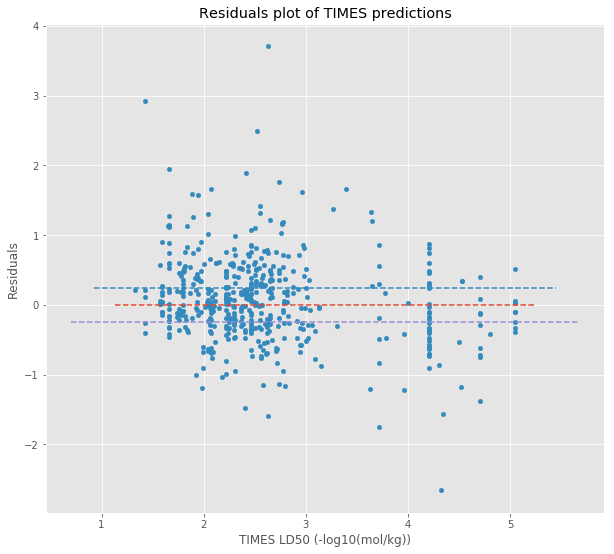

In [198]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
TIMES_vs_expt_pLD50.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50_minus_TIMES')
abline(0,0)
abline(0,0.24673953)
abline(0,-0.24673953)
plt.title('Residuals plot of TIMES predictions')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Residuals')
plt.savefig(figures_dir+'residuals_TIMES.png', dpi = 300)

In [60]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [64]:
rms_TIMES = MSE(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)**0.5
r_2_TIMES = r2_score(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)
mae_TIMES = mean_absolute_error(TIMES_vs_expt_pLD50.known_pLD50, TIMES_vs_expt_pLD50.TIMES_pLD50)

In [65]:
rms_TEST = MSE(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)**0.5
r_2_TEST = r2_score(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)
mae_TEST = mean_absolute_error(TEST_vs_expt_pLD50.known_pLD50, TEST_vs_expt_pLD50.TEST_pLD50)

In [66]:
print(rms_TIMES, r_2_TIMES, mae_TIMES)
print(rms_TEST, r_2_TEST, mae_TEST)

0.6198692001578542 0.5400955567692405 0.44740077120227323
0.64203800813979 0.2959552087036845 0.46892488610406463


In [68]:
relevant_acute_data.columns

Index(['DTXSID', 'CAS', 'name', 'known_LD50_mgkg', 'known_pLD50',
       'TEST_LD50_mgkg', 'TEST_pLD50', 'TIMES_LD50_mgkg', 'TIMES_pLD50',
       'TIMES', 'TEST', 'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES',
       'average_mass', 'qsar_ready_smiles', 'smiles',
       'predicted_toxicological_category', 'molecular_initiating_event_1',
       'effect_biological_outcome_1', 'molecular_initiating_event_2',
       'effect_biological outcome_2', 'molecular_initiating_event_3',
       'effect_biological outcome_3', 'alert_reliability', 'parameter_ranges',
       'correct_fragments_structural_domain',
       'incorrect_fragments_structural_domain',
       'unknown_fragments_structural_domain', 'total_structural_domain',
       'total_domain', 'acute_oral_toxicity_confidence'],
      dtype='object')

In [73]:
mask = (~relevant_acute_data['known_pLD50_minus_TEST'].isnull()) | (~relevant_acute_data['known_pLD50_minus_TIMES'].isnull())

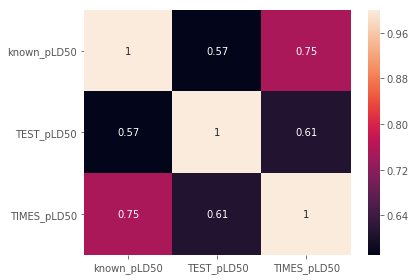

In [97]:
sns.heatmap(relevant_acute_data[mask][['known_pLD50',
       'TEST_pLD50', 'TIMES_pLD50']].corr(), annot = True)
plt.yticks(rotation=0)
#plt.title('Correlation of pairwise complete observations of TIMES/TEST predictions and experimental values')
plt.tight_layout()
plt.savefig(figures_dir+'corr_hm_all.png', dpi = 300)

In [83]:
mask2 = (~relevant_acute_data['known_pLD50_minus_TEST'].isnull()) & (~relevant_acute_data['known_pLD50_minus_TIMES'].isnull())
tt_overlap = relevant_acute_data[mask2]

In [84]:
tt_overlap.shape

(274, 31)

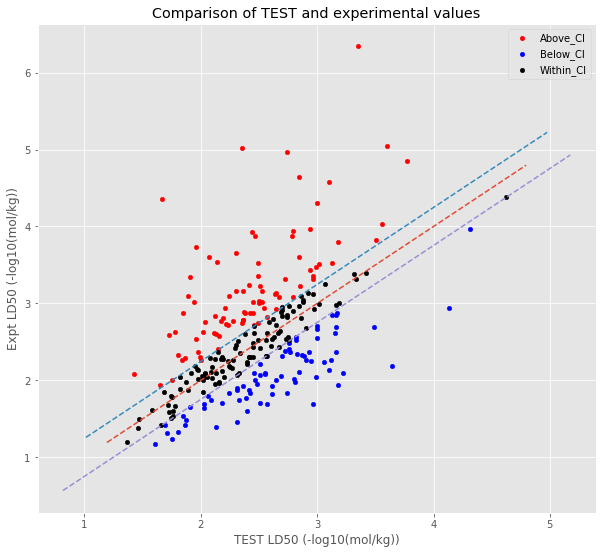

In [98]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = tt_overlap.groupby('TEST')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TEST_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TEST and experimental values')
plt.xlabel('TEST LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TEST_actual_overlap.png', dpi = 300)

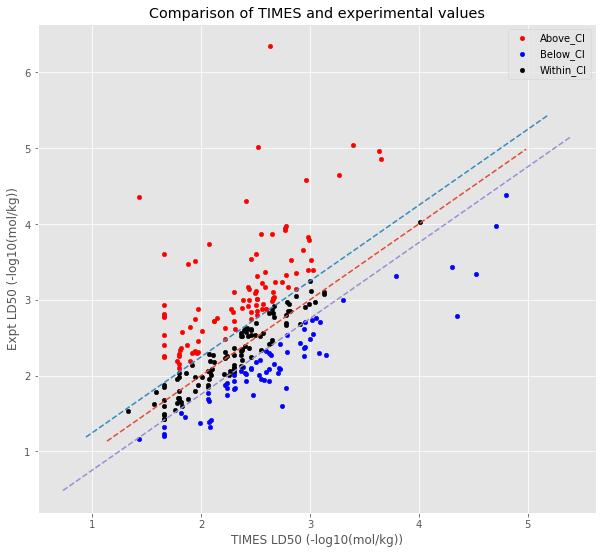

In [99]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,9))
colours = {'Above_CI': 'red', 'Within_CI':'black', 'Below_CI': 'blue'}

grouped = tt_overlap.groupby('TIMES')
for k,group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'TIMES_pLD50', y ='known_pLD50', label =k, color = colours[k] )
abline(1,0)
abline(1,0.24673953)
abline(1,-0.24673953)
plt.title('Comparison of TIMES and experimental values')
plt.xlabel('TIMES LD50 (-log10(mol/kg))')
plt.ylabel('Expt LD50 (-log10(mol/kg))')
plt.savefig(figures_dir+'TIMES_actual_overlap.png', dpi = 300)

In [103]:
tt_overlap['TIMES'].value_counts(normalize = True)

Within_CI    0.383212
Above_CI     0.361314
Below_CI     0.255474
Name: TIMES, dtype: float64

In [102]:
tt_overlap['TEST'].value_counts(normalize = True)

Within_CI    0.405109
Above_CI     0.317518
Below_CI     0.277372
Name: TEST, dtype: float64

In [104]:
print(MSE(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50)**0.5)
print(r2_score(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50))
print(mean_absolute_error(tt_overlap.known_pLD50, tt_overlap.TIMES_pLD50))

0.6496871799190282
0.2548359415077329
0.459442016266052


In [105]:
print(MSE(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50)**0.5)
print(r2_score(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50))
print(mean_absolute_error(tt_overlap.known_pLD50, tt_overlap.TEST_pLD50))

0.642975819040657
0.2701517248827663
0.4573047044629268


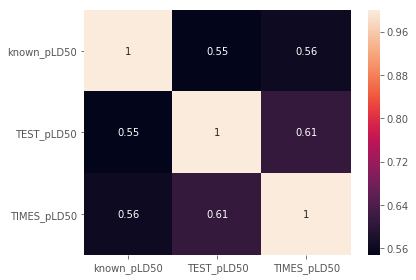

In [107]:
sns.heatmap(tt_overlap[['known_pLD50',
       'TEST_pLD50', 'TIMES_pLD50']].corr(), annot = True)
plt.yticks(rotation=0)
#plt.title('Correlation of pairwise complete observations of TIMES/TEST predictions and experimental values')
plt.tight_layout()
plt.savefig(figures_dir+'corr_hm_overlap.png', dpi = 300)

In [113]:
chemotypes = pd.read_csv(raw_dat_dir+'Acute_SMILES_Toxprints.tsv', sep = '\t')

In [117]:
chemotypes.rename(columns = {'M_NAME': 'CAS'}, inplace = True)

In [119]:
for_enrich = relevant_acute_data[['DTXSID', 'CAS', 'name', 'known_LD50_mgkg', 'known_pLD50',
       'TEST_LD50_mgkg', 'TEST_pLD50', 'TIMES_LD50_mgkg', 'TIMES_pLD50',
       'TIMES', 'TEST', 'known_pLD50_minus_TEST', 'known_pLD50_minus_TIMES',
       'average_mass', 'qsar_ready_smiles', 'smiles']]

In [120]:
for_enrich.shape

(8979, 16)

In [122]:
for_enrich_txps = pd.merge(for_enrich, chemotypes, on = 'CAS', how = 'left')

In [133]:
TEST_for_enrich = for_enrich_txps[(~for_enrich_txps['TEST'].isnull())]

In [134]:
TIMES_for_enrich = for_enrich_txps[(~for_enrich_txps['TIMES'].isnull())]

In [138]:
TEST_for_enrich['TEST_out_CI'] = TEST_for_enrich['TEST'].apply(lambda x: 0 if x == 'Within_CI' else 1)

/home/grace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
TIMES_for_enrich['TIMES_out_CI'] = TIMES_for_enrich['TIMES'].apply(lambda x: 0 if x == 'Within_CI' else 1)

/home/grace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
TIMES_for_enrich = TIMES_for_enrich.set_index('DTXSID')
TEST_for_enrich = TEST_for_enrich.set_index('DTXSID')

In [146]:
TIMES_for_enrich.columns.get_loc('atom:element_main_group')
TEST_for_enrich.columns.get_loc('atom:element_main_group')

15

In [149]:
#TEST_for_enrich.iloc[:,15:-1]

In [157]:
#TIMES_for_enrich.iloc[:,744]

In [155]:
import scipy.stats as stats

In [159]:
res_TEST = []
for i, column in TEST_for_enrich.iloc[:,15:-1].iteritems():
    if pd.crosstab(TEST_for_enrich.iloc[:,744],column).shape == (2,2):
        a = pd.crosstab(TEST_for_enrich.iloc[:,744],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        tested_active = (tp + fp)
        oddsratio, pvalue = stats.fisher_exact(a)
        res_TEST.append([oddsratio, pvalue, i, tp, tested_active])

In [160]:
res_TIMES = []
for i, column in TIMES_for_enrich.iloc[:,15:-1].iteritems():
    if pd.crosstab(TIMES_for_enrich.iloc[:,744],column).shape == (2,2):
        a = pd.crosstab(TIMES_for_enrich.iloc[:,744],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        tested_active = (tp + fp)
        oddsratio, pvalue = stats.fisher_exact(a)
        res_TIMES.append([oddsratio, pvalue, i, tp, tested_active])

In [164]:
def convert(lst):
    df = pd.DataFrame(lst)
    df.rename(columns = {0: 'OR', 1: 'p', 2 : 'TxP', 3: 'TP', 4: 'TP+FP'}, inplace = True)
    df = df.sort_values(by=['OR','p'], ascending = [True, False])
    return df

In [165]:
TEST_enrichments = convert(res_TEST)
TIMES_enrichments = convert(res_TIMES)

In [171]:
TEST_enrichments[(TEST_enrichments['OR'] >= 2.5) & (TEST_enrichments['p'] < 0.05 ) & (TEST_enrichments['TP'] >=3)].to_csv(processed_dat_dir+'TEST_enriched.csv')

In [173]:
TIMES_enrichments[(TIMES_enrichments['OR'] >= 2.5) & (TIMES_enrichments['p'] < 0.05 ) & (TIMES_enrichments['TP'] >=3)].to_csv(processed_dat_dir+'TIMES_enriched.csv')